# Lab Dimensionnality reduction

The goal of this lab session is to study different dimensionnality reduction methods. You will send only one notebook for both parts.

You have to send the filled notebook named **"DR_familyname1_familyname2.ipynb"** (groups of 2) by email to *lucca.guardiola@centralesupelec.fr* by December 3, 2020 and put **"AML-DR"** in the subject. 

We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# Principal component analysis PCA

### Theoretical Problem 
Consider a random variable X with p features, $X = (X^1,X^2,...X^p)$  

The goal of the PCA is to create $p$ new variables (principal components) which summarizes the best the variance of the previous $p$ variables such as if we take a subset of these new features the amount of variance provided is quite similar to the sum of variances of the whole original features. 

We search new random variables, named principal components $Z^i$, as a linear combination of the original features $X^i$ i.e projecting X in a new basis.

\begin{align} Z^1 &= \alpha_{11}X^1 +\alpha_{12}X^2 + ... \alpha_{1p}X^p &= A_1^TX \\
 Z^2 &= \alpha_{21}X^1 +\alpha_{22}X^2 + ... \alpha_{2p}X^p &= A_2^TX  \\
 &\vdots \\
 Z^p &= \alpha_{p1}X^1 +\alpha_{p2}X^2 + ... \alpha_{pp}X^p &= A_p^TX 
\end{align}

Eventually PCA looks for $A_1,...,A_p$ with the following conditions : 
- $\forall i,  A^i= \underset{A}{\arg \max}\; Var(Z^i)$
- $Var(Z^1)\ge Var(Z^2)\ge...\ge Var(Z^p)$
- $\forall  i,j \; / \; i\neq j, cov(Z^i,Z^j) = 0 $ 
- $\forall i, Var(X^i) = 1$

The first principal components will contain most of the variance of X, we need to extract these first principal components for reducing the dimensionnality of our dataset.

Geometrically it means we seach for an orthogonal basis such as the inertia of the data points around the new axis is maximum.

### Theoretical Solution

If the random variable $X = (X^1,X^2,...X^p)^T $ is reduced & centered, i.e $ \forall i, E(X^i) =0 $ and $ Var(Xî) =1 $. 

We call $\Sigma$ the covariance matrix of X
$$ \Sigma = P^TDP $$
with $D = diag(\lambda_1,\lambda_2,...,\lambda_p)$ such that $ \lambda_1 \ge\lambda_2 \ge ... \ge\lambda_p $

$\boxed{A_i =\text{ is the eigenvector of $\Sigma$ related to the eigenvalue $\lambda_i =$ the ith column of $P$ }}$

And $Var(Z^i) = \lambda_i$

## Practical Solution

Now imagine you have a dataset $M  \in \mathbb{R}^{n\times p}$ which could be interpreted as n realizations of the random variable X. 

You need to create a centered matrix $\bar M=\begin{bmatrix} M_{1,1}-\bar M_1 & \cdots & M_{1,p}-\bar M_p \\ \vdots & \ddots & \vdots \\ M_{n,1}-\bar M_1 & \cdots & M_{n,p}-\bar M_p\end{bmatrix} $

With $\bar M_j = \frac{1}{n}\sum_{i=1}^n M_i^j$

We call $\bar \Sigma = \frac{1}{n-1}\bar M \bar M^T $the scatter matrix, which is an estimation of the covariance matrix.

#### Point on reduction
We can make the choice to reduce $\bar M$ to give a variance of one to each feature.

- If we do so : variables related to noise will have the same weight after PCA than a relevant variable.
- If we don't reduce our dataset : high variance features will totally dominate the PCA.

However if the features aren't with the same units, reduction is mandatory.

### Projected data on the new basis

We diagonalize $ \bar \Sigma $ : $ \bar \Sigma = P^T D P $

The transformation of our dataset in the new basis : $P^TX^T = XP$



### Question : If we want to project X on the k first principal components. How must we do ? 


Answer : 

### Question : How do we compute the percentage of orignal variance retained by the k first principal components

Answer :  we take the trace of D (just for  \lambda_1,\lambda_2,...,\lambda_k)

### Tasks :  Compute the PCA transformation 

In [2]:
from sklearn.preprocessing import StandardScaler
class my_pca:

    
    
    def __init__(self,reduce=False):
        '''
        Attributes:
        
        sigma : np.array
            the scatter matrix
        eigenvectors : np.array
            the eigenvectors in a matrix : P 
        reduce : boolean 
            Reduce the scatter matrix or not i.e give a variance of 1 for each feature
        X : np.array
             The dataset we want to project in the new basis
        '''        
        
        self.sigma = None
        self.eigenvectors = None 
        self.reduce = reduce 
        
        
    def fit(self,X):
        """ From X, compute the scatter matrix (sigma) and diagonalize sigma 
        to extract the eigenvectors and the eigenvalues
        
        Parameters:
        -----------
        X: (n, p) np.array
            Data matrix
        
        Returns:
        -----
        Update self.eigenvalues, self.eigenvectors
        """       
        
        
        if self.reduce == True:
            scale=StandardScaler(with_mean=True, with_std=True)
            M=scale.fit_transform(X)
        else:
            scale=StandardScaler(with_mean=True, with_std=False)
            M=scale.fit_transform(X)
        
        self.sigma=(1/(len(M)-1))*(np.dot(M.T,M))
        eig_val, eig_vect = np.linalg.eig(self.sigma)
        eig_pairs = [(np.abs(eig_val[i]), eig_vect[:,i]) for i in range(len(eig_val))]

        # Sort the (eigenvalue, eigenvector) tuples from high to low
        #eig_pairs.sort(key=lambda x: x[0], reverse=True)
        
        #lambdas=[]
        #eighen=[]
        #for l in eig_pairs:
         #   lambdas.append(l[0])
          #  eighen.append(l[1])
        
        self.eigenvectors = np.array(eig_vect)
        self.eigenvalues = np.array(eig_val)
        
        
        
        
    
    def projection(self,X,no_dims):
        """ Project X on the no_dims first principal components 
        
        Parameters:
        -----------
        no_dims: integer
            The number of dimension of our projected dataset
        X : np.array
            Dataset
        
        Returns:
        -----
        The projection of X on the no_dims principal components
            np.array of size (n,no_dims)
        """
        
        P=self.eigenvectors[:,:no_dims]
        X_projected = np.dot(X,P)
        return X_projected   
            
    def variance(self,no_dims):
        """ Returns the percentage of the total variance preserved by the projected dataset
        
        Parameters:
        -----------
        no_dims: integer
            The number of dimension of our projected dataset
         """ 
        
        return sum(self.eigenvalues[:no_dims])/sum(self.eigenvalues)
        

### Application : Biostatistics 

We are going to apply PCA to a medical dataset, in order to do data analysis and to finally  tell which medical features could allow doctors to diagnose breast cancer.



In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
H = load_breast_cancer()
X = load_breast_cancer().data
y = load_breast_cancer().target
feature_names = load_breast_cancer().feature_names

It seems that units of the features can be different, therefore we had better reduce our dataset in the PCA. 
### Task : Apply PCA to the dataset 

In [5]:
pca=my_pca(reduce=True)
pca.fit(X)
print(X.shape)
print(pca.projection(X, 1).shape)


(569, 30)
(569, 1)


### How to choose the number of principal components for our projection ? 

As usual with unsupervised method there are many solutions to answer this question. Generally people either use elbow technique or keep a number of principal components such as it provides 80% or 90% or 95% of the total variance.

### Task : Print the percentage of variance retained versus the number of principal components 

In [6]:
for x in range(30):
    print('number of components :',x+1, " , % of variance : " ,pca.variance(x+1))

number of components : 1  , % of variance :  0.44272025607526355
number of components : 2  , % of variance :  0.6324320765155944
number of components : 3  , % of variance :  0.7263637090899083
number of components : 4  , % of variance :  0.7923850582446098
number of components : 5  , % of variance :  0.8473427431680725
number of components : 6  , % of variance :  0.887587963566906
number of components : 7  , % of variance :  0.9100953006967311
number of components : 8  , % of variance :  0.9259825386969442
number of components : 9  , % of variance :  0.9398790324425353
number of components : 10  , % of variance :  0.9515688143366667
number of components : 11  , % of variance :  0.961366004212647
number of components : 12  , % of variance :  0.9700713832200258
number of components : 13  , % of variance :  0.9781166330919931
number of components : 14  , % of variance :  0.9833502905469196
number of components : 15  , % of variance :  0.986488122714547
number of components : 16  , % of va

### Task : If we want to keep 90% of the variance how many principal components must we keep ?  

In [7]:
# So we need at most 7 components to save 90% of the variance

### Task : Plot the datapoints with their label along the 2 first principal components. 
Use plt.scatter

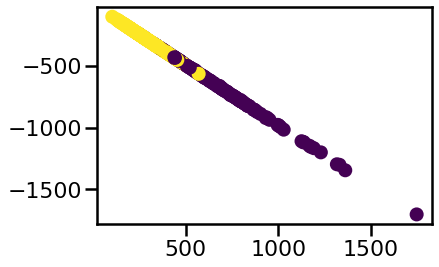

In [8]:
plt.scatter(pca.projection(X, 2)[:,0], pca.projection(X, 2)[:,1], c=y)

What we can see is that we can simply assign a label to datapoints regarding their position on the first principal components. 
So the first axis is sufficient to do a quite good classification of malignant/benin cases. 

For our diagnostic, we must know which feature affect the most this first principal components. 

To quantify this influence, we need to compute the corellation between the first principal component $Z^1$ and the orignal features. 

However we know that the covariance between 2 random variables can be defined as inner product : 
$$ Cov(X,Y) = \langle X , Y \rangle $$

## Question : 
Show that $Cor(Z^1,X^j) = \frac{\alpha_{1j}}{\lambda_1}$= the jth element of the first eigenvector / the first eigen value

we have cov(Z1,Xj)=a1j
$Var(Xj)=1$ and $Var(Zi)= \lambda_i $
So $Cor(Z^1,X^j) = \frac{\alpha_{1j}}{\lambda_1}$


### Task : Compute the corellation between Z1 and the original features 

In [9]:
sigma=pca.sigma
A=pca.eigenvectors[:,0]
lambdas=pca.eigenvalues[0]
print(np.dot(A,sigma))
print(lambdas*A)

[2.912495   1.38005456 3.02738159 2.94033625 1.89715457 3.18368943
 3.43801602 3.47065685 1.83831012 0.85635373 2.74054572 0.23187975
 2.81168937 2.69917863 0.19334084 2.2670833  2.04351074 2.44036678
 0.56544111 1.36467058 3.03349312 1.38996341 3.14848877 2.99190037
 1.70240765 2.79532375 3.04374992 3.33803554 1.63524399 1.75338415]
[2.912495   1.38005456 3.02738159 2.94033625 1.89715457 3.18368943
 3.43801602 3.47065685 1.83831012 0.85635373 2.74054572 0.23187975
 2.81168937 2.69917863 0.19334084 2.2670833  2.04351074 2.44036678
 0.56544111 1.36467058 3.03349312 1.38996341 3.14848877 2.99190037
 1.70240765 2.79532375 3.04374992 3.33803554 1.63524399 1.75338415]


In [11]:
import math

A=pca.eigenvectors
lambdas=pca.eigenvalues

cor=[]

for i in range(len(A[:,0])):
    cor.append(A[i][0]/lambdas[0])
    
print(cor)

[0.01645265653190502, 0.0077959150681683196, 0.017101649788576312, 0.016609931476192982, 0.010717008118526931, 0.017984631304981603, 0.019421319807152757, 0.019605707543670824, 0.010384596384844368, 0.004837534077737789, 0.01548131667572009, 0.001309886524410009, 0.01588320650810554, 0.015247634408524302, 0.0010921805488194277, 0.012806731988082454, 0.011543772717582714, 0.013785608708701923, 0.0031941714421183432, 0.007709011128286027, 0.017136173767881974, 0.007851890096862315, 0.01778578312445718, 0.01690121670954347, 0.009616884608966297, 0.01579075727332761, 0.017194114325260107, 0.018856530988662787, 0.009237477746315613, 0.00990485036139055]


### Question : Is there a feature influencing substantially the first principal component ? 

All the features have a correlation between 0.1% and 2% with the first axis so we cannot say that one featur influence a lot the first principal component.

### Question : According to the previous question can we make a rule based on the orignal features to diagnose breast cancer ? 

As all components have a comparable weight on the first principal component, which is sufficient to do a quite good classification, it seems not possible to make a rule based on the original features to diagnose the breast cancer.

### Limitations of PCA. 

By its linear nature, PCA suffers from its inability to extract complicated structure. 

Let's see with an exemple. 

In [12]:
X = np.loadtxt('mnist2500_X.txt')
labels = np.loadtxt('mnist2500_labels.txt')

### Tasks : 
- Apply PCA to the dataset 
- Project in 2D and plot the dataset with their label

C:\Users\theoc\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


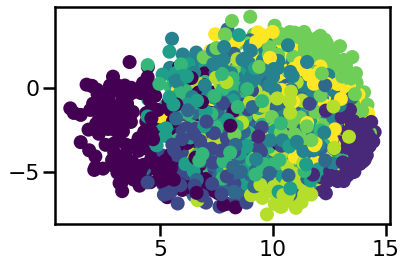

In [13]:
pca=my_pca(reduce=True)
pca.fit(X)
plt.scatter(pca.projection(X, 2)[:,0], pca.projection(X, 2)[:,1], c=labels)

It's quite impossible to distinguish some clusters. Right ?  YES IMPOSSIBLE

### Non linear embedding : t-sne

In order to visualize dataset accurately, we are going to project our data using non linear methods in order to decompose faithfully the dataset in order to extract the intrisec structure of the data.

Sklearn definition of tsne : t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. 




In [14]:
from sklearn.manifold import TSNE

### Tasks : 
- Apply tsne to the dataset 
- Plot the dataset with their label

In [15]:
model= TSNE()
new_X=model.fit_transform(X)


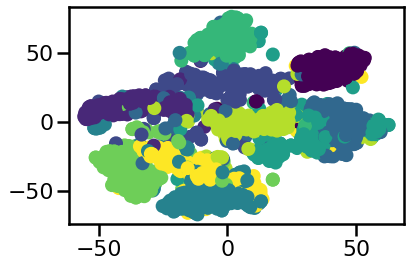

In [16]:
plt.scatter(new_X[:,0], new_X[:,1], c=labels)

In [17]:
new_X.shape

(2500, 2)

We can observe some distinct cluster with only two dimension on the TSNE model but it can be improve 
because the plotting is still compact